# Practical Session 1 :
 ## Image pansharpening

# Dowmloading images

In [24]:
# get_ipython().system('wget https://perso.telecom-paristech.fr/mroux/MPT/images.zip')
# get_ipython().system('unzip -qq images.zip')
# get_ipython().system('ls images')
# get_ipython().system('rm images.zip')
# get_ipython().system('rm -rf __MACOSX')

 The image should now appear in the "Files" menu on the left.
 To use the files stored in your google Drive, you need to click the "Mount Drive" button in the Files menu. 
 Then, you will need to modify the path variable in the code, with the path name of your image in the drive Folder.
 
 Here are the imports you should do : 

In [1]:

import matplotlib.pyplot as plt
import skimage.io as skio
import skimage
import numpy as np
import numpy.fft as fft
from scipy import ndimage

student = True

from skimage import data
from skimage.color import rgb2hsv
from skimage.color import  hsv2rgb
from skimage.transform import resize

plt.style.use("dark_background")

In [2]:
def spherique2cartesien_3D(rho,phi,theta):
    x = rho * np.sin(theta) * np.cos(phi)
    y = rho * np.sin(theta) * np.sin(phi)   
    z = rho * np.cos(theta)
    
    return x,y,z

def cartesien2spherique_3D(x,y,z):
    
    rho = np.sqrt( x * x + y * y + z * z )
    theta = np.arccos ( z / rho )
    phi = np.arctan2 ( y , x )
    
    return rho,phi,theta



In [3]:
## CROSS CORRELATION

def EvalCrossCorrelation(im1,im2):
    x1 = im1.reshape(-1)
    m1 = np.mean(x1,axis=0)
    y1=x1-m1

    x2 = im2.reshape(-1)
    m2 = np.mean(x2,axis=0)
    y2=x2-m2

    v12=np.dot(y1.T,y2)
    v11=np.dot(y1.T,y1)
    v22=np.dot(y2.T,y2)

    cc=v12/np.sqrt(v11*v22)

    return cc


### Image selection

In [4]:
pan=skio.imread('valfleur.tif')/255
ms1=skio.imread('subfleurR.tif')/255
ms2=skio.imread('subfleurV.tif')/255
ms3=skio.imread('subfleurB.tif')/255

VT=skio.imread('fleur.tif')/255


pan=skio.imread('valpyramide24bits.tif')/255
ms1=skio.imread('subpyramide24bitsR.tif')/255
ms2=skio.imread('subpyramide24bitsV.tif')/255
ms3=skio.imread('subpyramide24bitsB.tif')/255

VT=skio.imread('pyramide24bits.tif')/255



pan=skio.imread('valzebres.tif')/255
ms1=skio.imread('subzebresR.tif')/255
ms2=skio.imread('subzebresV.tif')/255
ms3=skio.imread('subzebresB.tif')/255

VT=skio.imread('zebres.tif')/255


pan=skio.imread('valfruits.tif')/255
ms1=skio.imread('subfruitsR.tif')/255
ms2=skio.imread('subfruitsV.tif')/255
ms3=skio.imread('subfruitsB.tif')/255

VT=skio.imread('fruits.tif')/255

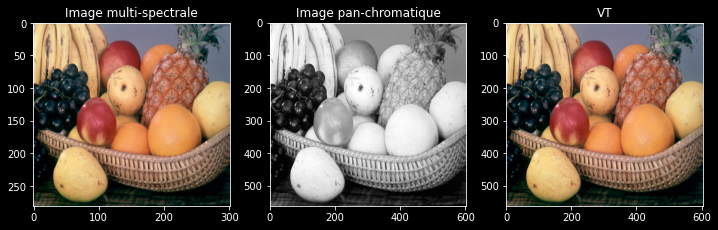

In [6]:
s = ms1.shape
rgb = np.zeros((s[0],s[1],3))
#,dtype=np.float32)
rgb[:,:,0] = ms1
rgb[:,:,1] = ms2
rgb[:,:,2] = ms3

span=pan.shape
sms=ms1.shape


fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(rgb)
plt.title('Image multi-spectrale')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(pan,cmap="gray")
plt.title('Image pan-chromatique')
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(VT)
plt.title('VT')
plt.show()

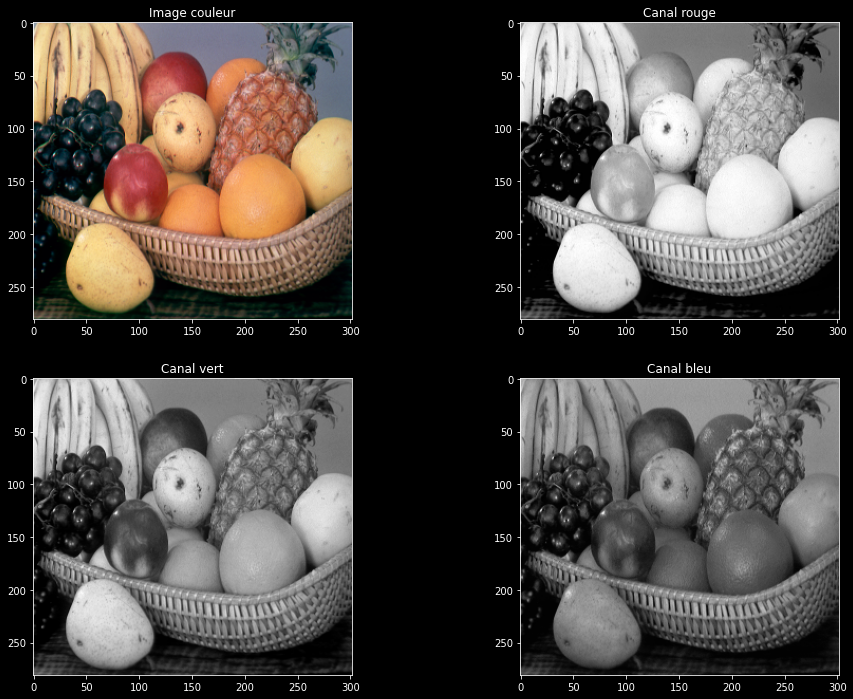

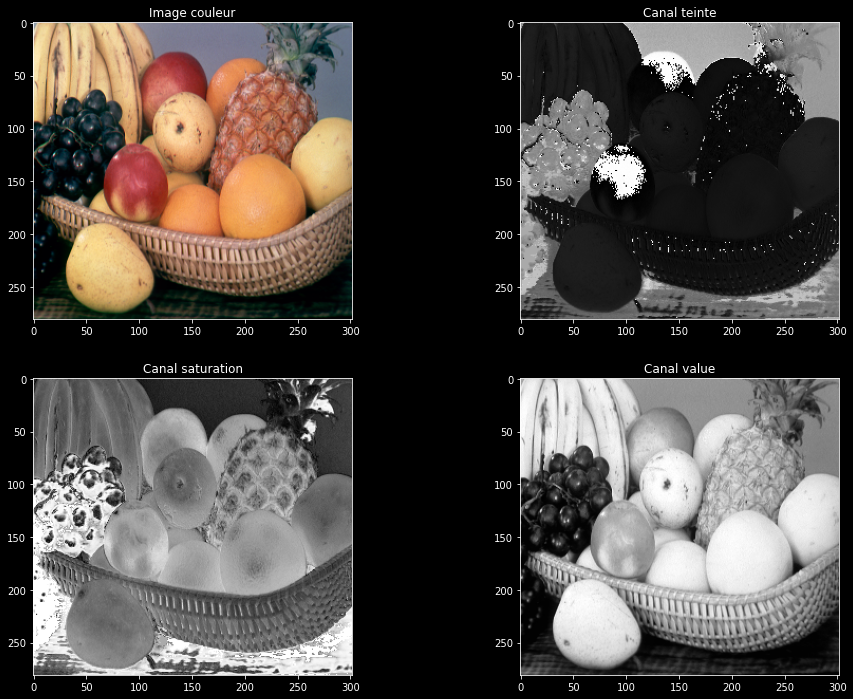

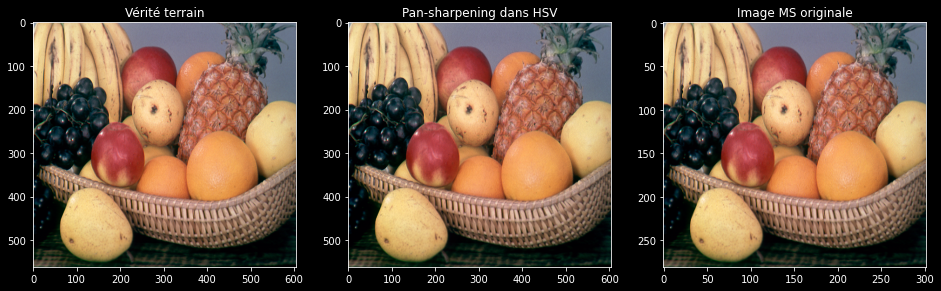

correlation HSV 0.9951937865321475


In [38]:
### Espace HSV


hsv=rgb2hsv(rgb)

fig = plt.figure(figsize = (16,12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(rgb)
plt.title('Image couleur')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(rgb[:,:,0],cmap="gray")
plt.title('Canal rouge')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(rgb[:,:,1],cmap="gray")
plt.title('Canal vert')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(rgb[:,:,2],cmap="gray")
plt.title('Canal bleu')

fig = plt.figure(figsize = (16,12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(rgb)
plt.title('Image couleur')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(hsv[:,:,0],cmap="gray")
plt.title('Canal teinte')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(hsv[:,:,1],cmap="gray")
plt.title('Canal saturation')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(hsv[:,:,2],cmap="gray")
plt.title('Canal value')


### Sur-échantillonnage grossier à la résolution de l'image panchromatique

s=pan.shape
surh=resize(hsv[:,:,0],(s[0],s[1]),order=0)
surs=resize(hsv[:,:,1],(s[0],s[1]),order=1)
surv=resize(hsv[:,:,2],(s[0],s[1]),order=1)


# Ré-affectation des canaux 'h','s' et 'v'


s = pan.shape
surhsv = np.zeros((s[0],s[1],3),dtype=np.float32)
surhsv[:,:,0] = surh
surhsv[:,:,1] = surs
surhsv[:,:,2] = pan

surrgb=hsv2rgb(surhsv)

fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(VT)
plt.title('Vérité terrain')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(surrgb)
plt.title('Pan-sharpening dans HSV')
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(rgb)
plt.title('Image MS originale')
plt.show()



cc=0
for i in range(3):
    cc = cc + EvalCrossCorrelation(VT[:,:,i],surrgb[:,:,i])
cc = cc / 3

print('correlation HSV',cc)

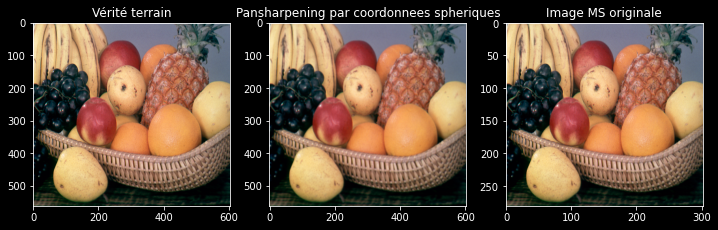

correlation Spherical Coordinates 0.9904910549560313


In [31]:
# Pan-sharpening dans un repère sphérique

### Sur-échantillonnage à la résolution de l'image panchromatique

s=pan.shape

surms1=resize(ms1,(s[0],s[1]),order=1)
surms2=resize(ms2,(s[0],s[1]),order=1)
surms3=resize(ms3,(s[0],s[1]),order=1)

gain=1


for i in range(s[0]):
    for j in range(s[1]):
        
        x=surms1[i][j]/255
        y=surms2[i][j]/255
        z=surms3[i][j]/255
        
        rho,phi,theta=cartesien2spherique_3D(x,y,z)
        rho=pan[i][j]*gain
        x,y,z=spherique2cartesien_3D(rho,phi,theta)
    
        surms1[i][j]
        surms2[i][j]
        surms3[i][j]
        
        
newms = np.zeros((s[0],s[1],3),dtype=np.uint8)
newms[:,:,0] = surms1*255
newms[:,:,1] = surms2*255
newms[:,:,2] = surms3*255

fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(VT)
plt.title('Vérité terrain')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(newms)
plt.title('Pansharpening par coordonnees spheriques')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(rgb)
plt.title('Image MS originale')

plt.show()

cc=0
for i in range(3):
    cc = cc + EvalCrossCorrelation(VT[:,:,i],newms[:,:,i])
cc = cc / 3

print('correlation Spherical Coordinates',cc)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


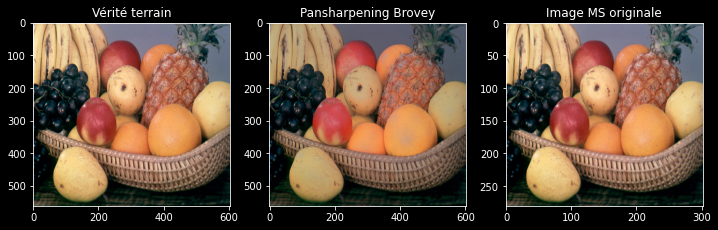

correlation Brovey 0.9696025804812468


In [32]:
# Brovey

### Sur-échantillonnage à la résolution de l'image panchromatique

s=pan.shape

surms1=resize(ms1,(s[0],s[1]),order=1)
surms2=resize(ms2,(s[0],s[1]),order=1)
surms3=resize(ms3,(s[0],s[1]),order=1)

gain=2

total = ( surms1 + surms2 + surms3 ) / gain + 0.001


newms = np.zeros((s[0],s[1],3),dtype=np.float64)
newms[:,:,0] = surms1*pan/total
newms[:,:,1] = surms2*pan/total
newms[:,:,2] = surms3*pan/total


fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(VT)
plt.title('Vérité terrain')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(newms)
plt.title('Pansharpening Brovey')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(rgb)
plt.title('Image MS originale')

plt.show()



cc=0
for i in range(3):
    cc = cc + EvalCrossCorrelation(VT[:,:,i],newms[:,:,i])
cc = cc / 3

print('correlation Brovey',cc)


Text(0.5, 1.0, 'TF - image pan-chromatique')

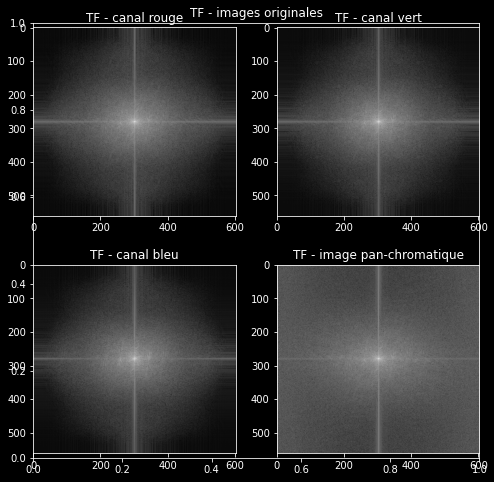

In [33]:
###[] Espace de Fourier



s=pan.shape
surms1=resize(ms1,(s[0],s[1]),order=1)
surms2=resize(ms2,(s[0],s[1]),order=1)
surms3=resize(ms3,(s[0],s[1]),order=1)

fftms1=np.fft.fftshift(np.fft.fft2(surms1))
fftms2=np.fft.fftshift(np.fft.fft2(surms2))
fftms3=np.fft.fftshift(np.fft.fft2(surms3))

fftpan=np.fft.fftshift(np.fft.fft2(pan))


visufftms1=np.log((np.abs(fftms1)+0.1))
visufftms1=visufftms1/np.max(visufftms1)

visufftms2=np.log((np.abs(fftms2)+0.1))
visufftms2=visufftms2/np.max(visufftms2)

visufftms3=np.log((np.abs(fftms3)+0.1))
visufftms3=visufftms3/np.max(visufftms3)

visufftpan=np.log((np.abs(fftpan)+0.1))
visufftpan=visufftpan/np.max(visufftpan)


fig = plt.figure(figsize = (8,8))
plt.title('TF - images originales')
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(visufftms1,cmap="gray")
plt.title('TF - canal rouge')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow((visufftms2),cmap="gray")
plt.title('TF - canal vert')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(visufftms3,cmap="gray")
plt.title('TF - canal bleu')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(visufftpan,cmap="gray")
plt.title('TF - image pan-chromatique')



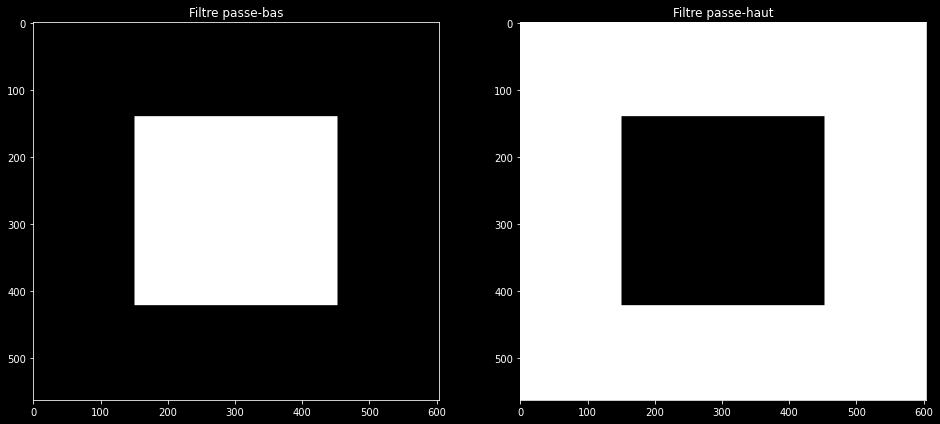

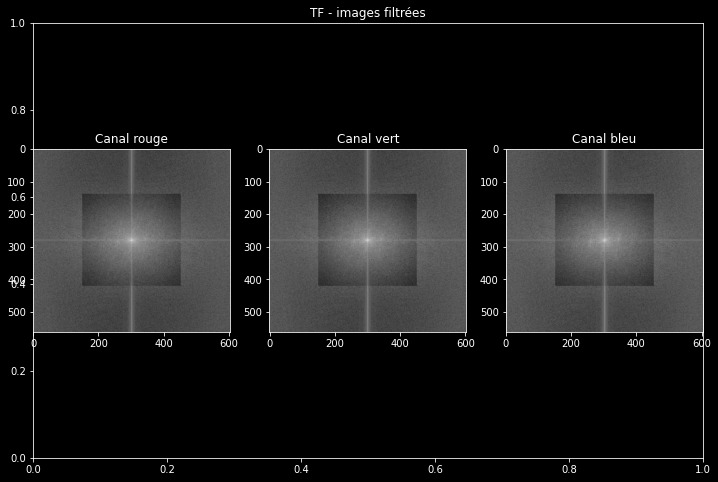

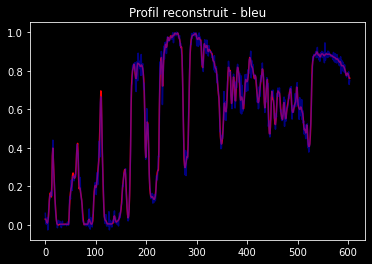

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


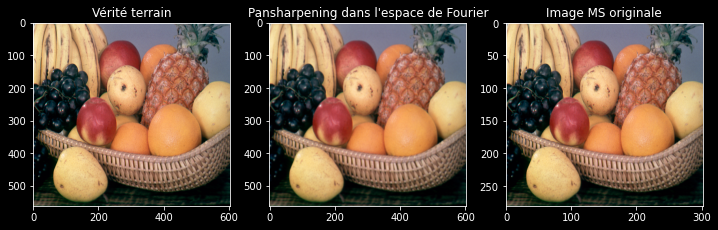

correlation Fourier 0.9901400266474879


In [39]:
# Calcul des filtres passe-bas et passe-haut

s=pan.shape

## Filtre passe-bas parfait (porte)

passebas = np.zeros((s[0],s[1]),dtype=np.float32)

passebas[np.uint32(s[0]/4):np.uint32(3*s[0]/4),np.uint32(s[1]/4):np.uint32(3*s[1]/4)]=1

# Filtre de Hanning
#
#passebasy = np.zeros((s[0],1),dtype=np.float32)
#passebasx = np.zeros((1,s[1]),dtype=np.float32)
#
#passebasy2=np.hanning(s[0])
#passebasx2=np.hanning(s[1])
#for i in range(s[0]):
#    passebasy[i,0] = passebasy2[i]
#
#for i in range(s[1]):
#   passebasx[0,i] = passebasx2[i]
#    
#passebas=np.dot(passebasy,passebasx)

# Filtre passe-haut

passehaut=1-passebas


fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(passebas,cmap="gray")
plt.title('Filtre passe-bas')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow((passehaut),cmap="gray")
plt.title('Filtre passe-haut')
plt.show()

fftpan1=passebas*fftms1+passehaut*fftpan;
fftpan2=passebas*fftms2+passehaut*fftpan;
fftpan3=passebas*fftms3+passehaut*fftpan;


visufftpan1=np.log((np.abs(fftpan1)+0.1))
visufftpan1=visufftpan1/np.max(visufftpan1)

visufftpan2=np.log((np.abs(fftpan2)+0.1))
visufftpan2=visufftpan2/np.max(visufftpan2)

visufftpan3=np.log((np.abs(fftpan3)+0.1))
visufftpan3=visufftpan3/np.max(visufftpan3)


fig = plt.figure(figsize = (12,8))
plt.title('TF - images filtrées')
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(visufftpan1,cmap="gray")
plt.title('Canal rouge')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow((visufftpan2),cmap="gray")
plt.title('Canal vert')
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(visufftpan3,cmap="gray")
plt.title('Canal bleu')


newms1=np.real(np.fft.ifft2(np.fft.fftshift(fftpan1)))
newms2=np.real(np.fft.ifft2(np.fft.fftshift(fftpan2)))
newms3=np.real(np.fft.ifft2(np.fft.fftshift(fftpan3)))


plt.figure()
plt.plot(surms1[200,:],color='red')
plt.title('Profil initial - rouge' )
plt.plot(newms1[200,:],color='blue',alpha=0.5)
plt.title('Profil reconstruit - bleu')
plt.show()


s = pan.shape
newms = np.zeros((s[0],s[1],3),dtype=np.float32)
newms[:,:,0] = newms1
newms[:,:,1] = newms2
newms[:,:,2] = newms3



fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(VT)
plt.title('Vérité terrain')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(newms)
plt.title("Pansharpening dans l'espace de Fourier")
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(rgb)
plt.title('Image MS originale')
plt.show()


cc=0
for i in range(3):
    cc = cc + EvalCrossCorrelation(VT[:,:,i],newms[:,:,i])
cc = cc / 3

print('correlation Fourier',cc)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mean [0.55989403 0.43031618 0.33230972]
mean [0.55989403 0.43031618 0.33230972]
cov mat [[0.10285589961656254 0.06875390657186267 0.04298376467706205]
 [0.06875390657186267 0.05558899915865504 0.03777956773659024]
 [0.04298376467706205 0.03777956773659024 0.03174561099414585]]
eigen [0.00225394 0.0132958  0.17464077]
eigen [0.00225394 0.0132958  0.17464077]
matrice [[0.7485458995886075 -0.6026309533168147 -0.27661339503637594]
 [0.5498838713423898 0.33104155780056554 0.7668371502779983]
 [0.3705492737094345 0.7261180490205724 -0.579176842285643]]
matrice [[0.7485458995886075 -0.6026309533168147 -0.27661339503637594]
 [0.5498838713423898 0.33104155780056554 0.7668371502779983]
 [0.3705492737094345 0.7261180490205724 -0.579176842285643]]
mapped X mapping [[-0.1495040780122887 0.16332983720215308 -0.02552983067299847]
 [-0.1495040780122887 0.16332983720215308 -0.02552983067299847]
 [-0.14632599791321643 0.15916306115155576 -0.020256787040594654]
 [-0.14495381887096495 0.15793547054967888 

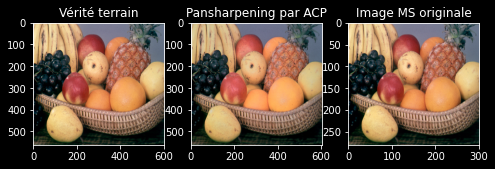

In [17]:
## ACP


s = ms1.shape
rgb = np.zeros((s[0],s[1],3))
#,dtype=np.float32)
rgb[:,:,0] = ms1
rgb[:,:,1] = ms2
rgb[:,:,2] = ms3

span=pan.shape
sms=ms1.shape



lr_red_img= ms1
lr_green_img = ms2
lr_blue_img=ms3


pan_img=pan


lr_red_arr = np.asarray(lr_red_img)
lr_green_arr = np.asarray(lr_green_img)
lr_blue_arr = np.asarray(lr_blue_img)

pan_arr = np.asarray(pan_img)


scale_x = pan_arr.shape[0] / lr_red_arr.shape[0]
scale_y = pan_arr.shape[1] / lr_red_arr.shape[1]

lr_red_upsampled_img=resize(lr_red_img,(pan_arr.shape[0],pan_arr.shape[1]),order=1)
lr_green_upsampled_img=resize(lr_green_img,(pan_arr.shape[0],pan_arr.shape[1]),order=1)
lr_blue_upsampled_img=resize(lr_blue_img,(pan_arr.shape[0],pan_arr.shape[1]),order=1)

lr_red_upsampled_arr = np.asarray(lr_red_upsampled_img)
lr_green_upsampled_arr = np.asarray(lr_green_upsampled_img)
lr_blue_upsampled_arr = np.asarray(lr_blue_upsampled_img)





def PCA(X, no_dims):
    mapping = {}
    
    # calculate mean of elements for each band
    mapping['mean'] = np.ma.mean(X, axis = 0)

    # column-wise zero empirical mean
    X = X - mapping['mean']
    print( 'mean' , mapping['mean'])
    print( 'mean' , mapping['mean'])

    # covariance matrix, row = observations, column = variables
    C = np.ma.cov(X, rowvar=False)
    
    print('cov mat',C)

    # eigenvalue decomposition
    eigenvalues, M = np.linalg.eigh(C, UPLO = 'U')
    ind = np.arange(0, eigenvalues.shape[0], 1)
    ind = np.flip(ind)
    
    print('eigen',eigenvalues)
#    print('matrice',M)
    
    # flip M in each row so that the first axis becomes the highest variance
    M = M[:, ind[0:no_dims]]
    eigenvalues = eigenvalues[0:no_dims]

    print('eigen',eigenvalues)
    print('matrice',M)
    
    print('matrice',M)
    
    mappedX = np.ma.dot(X, M)

    mapping['M'] = M
    mapping['lambda'] = eigenvalues

    print('mapped X mapping',mappedX,mapping)
    
    return (mappedX, mapping)

def inversePCA(E, P, MeanV):
    return np.ma.dot(P, E.T) + MeanV

row_number, col_number = pan_arr.shape

image = np.zeros((row_number, col_number, 3))
image[:,:,0] = lr_red_upsampled_arr
image[:,:,1] = lr_green_upsampled_arr
image[:,:,2] = lr_blue_upsampled_arr


m, n, d = image.shape

M = np.reshape(image, (m * n, d))
PCAData, PCAMap = PCA(M, d)
PCAData = np.reshape(PCAData, (m, n, d))
F = PCAData
PC1 = (pan_arr - pan_arr.mean()) * (F[:,:,0].std() / pan_arr.std()) + F[:,:,0].mean()
F[:,:,0] = PC1
F = inversePCA(PCAMap['M'], np.reshape(F, (m * n, d)), PCAMap['mean'])
sharpened = np.reshape(F, (m, n, d))




fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(VT)
plt.title('Vérité terrain')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(sharpened)
plt.title('Pansharpening par ACP')
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(rgb)
plt.title('Image MS originale')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


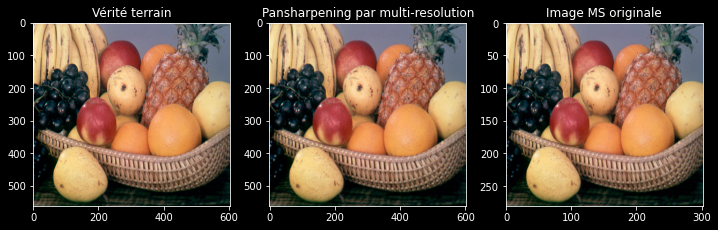

correlation multi-resolution 0.9915087963945702


In [19]:
import cv2 as cv
# 4. Approche multi-résolution avec 1 niveau de résolution




# Attribution des histogrammes des canaux spectraux à l'imagepanchromatique


s=pan.shape
surms1=resize(ms1,(s[0],s[1]),order=1)
surms2=resize(ms2,(s[0],s[1]),order=1)
surms3=resize(ms3,(s[0],s[1]),order=1)

sigma=5

filter_type = "median"

if filter_type == "gaussian":
    filter1=ndimage.gaussian_filter(surms1, sigma)
    filter2=ndimage.gaussian_filter(surms2, sigma)
    filter3=ndimage.gaussian_filter(surms3, sigma)

    
if filter_type == "bilateral":
    surms1 = surms1.astype(np.float32)
    surms2 = surms2.astype(np.float32)
    surms3 = surms3.astype(np.float32)
    filter1=cv.bilateralFilter(surms1,5,75,75,borderType=cv.BORDER_REFLECT)
    filter2=cv.bilateralFilter(surms2,5,75,75,borderType=cv.BORDER_REFLECT)
    filter3=cv.bilateralFilter(surms3,5,75,75,borderType=cv.BORDER_REFLECT)

if filter_type == "median":
    filter1=ndimage.median_filter(surms1, sigma)
    filter2=ndimage.median_filter(surms2, sigma)
    filter3=ndimage.median_filter(surms3, sigma)

if filter_type == "morpho":
    filter1=ndimage.gaussian_filter(surms1, sigma)
    filter2=ndimage.gaussian_filter(surms2, sigma)
    filter3=ndimage.gaussian_filter(surms3, sigma)



gain=1

newms1 = np.zeros((s[0],s[1]),dtype=np.float32)
newms2 = np.zeros((s[0],s[1]),dtype=np.float32)
newms3 = np.zeros((s[0],s[1]),dtype=np.float32)

newms1=surms1+gain*(surms1-filter1)
newms2=surms2+gain*(surms2-filter2)
newms3=surms3+gain*(surms3-filter3)


s = pan.shape
newms = np.zeros((s[0],s[1],3),dtype=np.float32)
newms[:,:,0] = newms1
newms[:,:,1] = newms2
newms[:,:,2] = newms3

#
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(VT)
plt.title('Vérité terrain')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(newms)
plt.title('Pansharpening par multi-resolution')
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(rgb)
plt.title('Image MS originale')
plt.show()



cc=0
for i in range(3):
    cc = cc + EvalCrossCorrelation(VT[:,:,i],newms[:,:,i])
cc = cc / 3

print('correlation multi-resolution',cc)


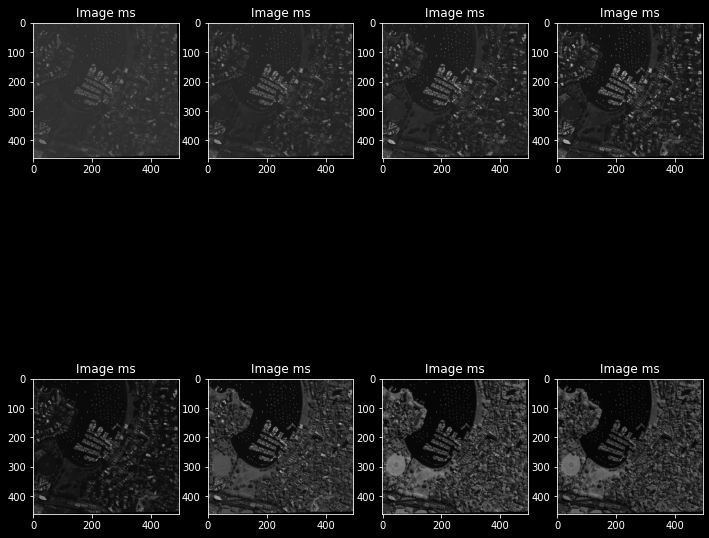

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


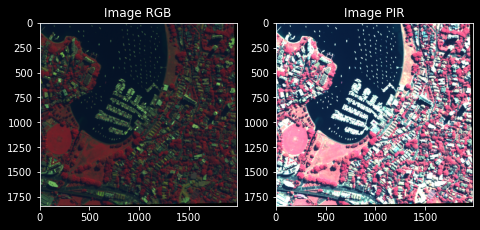

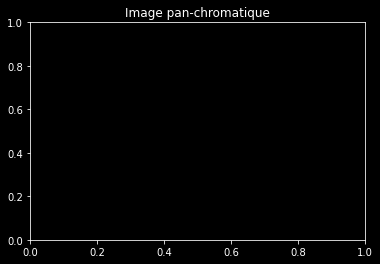

In [40]:
pan=skio.imread('PAN2.TIF')
ms=skio.imread('MS2.TIF')
s = ms.shape

rgb = np.zeros((s[0],s[1],3),dtype=np.float32)
ms0 = ms[0,:,:]
ms1 = ms[1,:,:]
ms2 = ms[2,:,:]
ms3 = ms[3,:,:]
ms4 = ms[4,:,:]
ms5 = ms[5,:,:]
ms6 = ms[6,:,:]
ms7 = ms[7,:,:]

s=pan.shape
surms0=resize(ms0,(s[0],s[1]),order=1)
surms1=resize(ms1,(s[0],s[1]),order=1)
surms2=resize(ms2,(s[0],s[1]),order=1)
surms3=resize(ms3,(s[0],s[1]),order=1)
surms4=resize(ms4,(s[0],s[1]),order=1)
surms5=resize(ms5,(s[0],s[1]),order=1)
surms6=resize(ms6,(s[0],s[1]),order=1)
surms7=resize(ms7,(s[0],s[1]),order=1)


pir = np.zeros((s[0],s[1],3),dtype=np.float32)

total = (surms0+surms1+surms2+surms3+surms4+surms5+surms6+surms7)/8+1

ms7bis=surms7*pan/total
ms3bis=surms3*pan/total
ms0bis=surms0*pan/total

pir[:,:,0] = ms7bis
pir[:,:,1] = ms3bis
pir[:,:,2] = ms0bis

rgb = np.zeros((s[0],s[1],3),dtype=np.float32)
rgb[:,:,0] = surms7
rgb[:,:,1] = surms3
rgb[:,:,2] = surms0


fig = plt.figure(figsize = (12,12))


ax1 = fig.add_subplot(2,4,1)
ax1.imshow(ms0,cmap="gray")
plt.title('Image ms')

ax2 = fig.add_subplot(2,4,2)
ax2.imshow(ms1,cmap="gray")
plt.title('Image ms')


ax3 = fig.add_subplot(2,4,3)
ax3.imshow(ms2,cmap="gray")
plt.title('Image ms')

ax4 = fig.add_subplot(2,4,4)
ax4.imshow(ms3,cmap="gray")
plt.title('Image ms')

ax5 = fig.add_subplot(2,4,5)
ax5.imshow(ms4,cmap="gray")
plt.title('Image ms')

ax6 = fig.add_subplot(2,4,6)
ax6.imshow(ms5,cmap="gray")
plt.title('Image ms')

ax7 = fig.add_subplot(2,4,7)
ax7.imshow(ms6,cmap="gray")
plt.title('Image ms')

ax8 = fig.add_subplot(2,4,8)
ax8.imshow(ms7,cmap="gray")
plt.title('Image ms')

plt.show()


minrgb=np.min(rgb)

maxrgb=np.max(rgb)

minpir=np.min(pir)

maxpir=np.max(pir)/20


fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,3,1)
ax1.imshow((rgb-minrgb)/(maxrgb-minrgb))
plt.title('Image RGB')

ax2 = fig.add_subplot(1,3,2)
ax2.imshow((pir-minpir)/(maxpir-minpir))
plt.title('Image PIR')
plt.show()

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(pan/255,cmap="gray")
plt.title('Image pan-chromatique')

plt.show()